<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#2020" data-toc-modified-id="2020-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>2020</a></span><ul class="toc-item"><li><span><a href="#all" data-toc-modified-id="all-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>all</a></span></li></ul></li><li><span><a href="#2019" data-toc-modified-id="2019-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2019</a></span><ul class="toc-item"><li><span><a href="#mse-x-pop_size-(50-1000)" data-toc-modified-id="mse-x-pop_size-(50-1000)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>mse x pop_size (50-1000)</a></span></li><li><span><a href="#merge-with-other-df" data-toc-modified-id="merge-with-other-df-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>merge with other df</a></span></li><li><span><a href="#day-4" data-toc-modified-id="day-4-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>day 4</a></span></li><li><span><a href="#by-session" data-toc-modified-id="by-session-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>by session</a></span></li></ul></li></ul></div>

# 2020

In [8]:
df_decode = pd.read_csv('decoded2020-place.csv')
df_expt = pd.read_csv('big-df-by-expt.csv')
df_merge = pd.merge(df_decode,df_expt,left_on = "expt_id",right_on ="trial_id",suffixes=('','_y'))

In [29]:
# filter
df_merge = df_merge.query("wt_full_mse < 400")

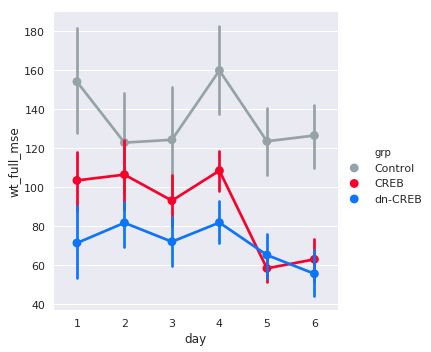

In [47]:
# filter large values 
sns.catplot(data = df_merge,
            kind="point",
            x ="day",
            y = "wt_full_mse",
            hue="grp",
            palette = colors,
           ci = 68)

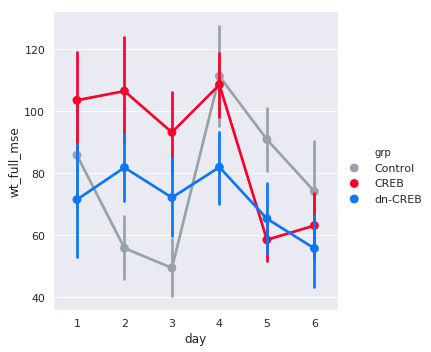

In [48]:
# filter large values 
sns.catplot(data = df_merge.query("mouseID not in ['mjd500','mjd503', 'mjd511']"),
            kind="point",
            x ="day",
            y = "wt_full_mse",
            hue="grp",
            palette = colors,
           ci = 68)

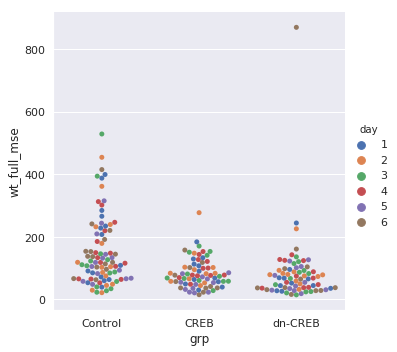

In [18]:
sns.catplot(kind="swarm",x="grp",y="wt_full_mse",hue="day",data=df_merge)

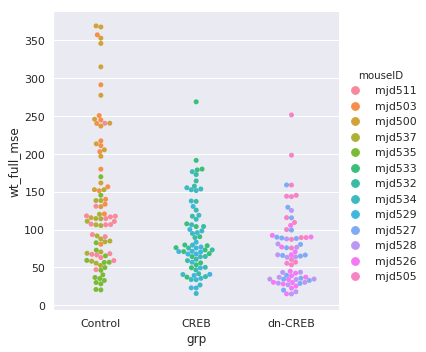

In [31]:
sns.catplot(kind="swarm",x="grp",y="wt_full_mse",hue="mouseID",data=df_merge)

## all

In [21]:
df_decode = pd.read_csv('decoded2020-all.csv')
df_expt = pd.read_csv('big-df-by-expt.csv')
df_merge = pd.merge(df_decode,df_expt,left_on = "expt_id",right_on ="trial_id",suffixes=('','_y'))

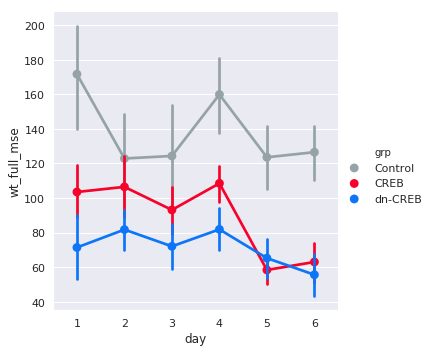

In [25]:
# filter large values 
sns.catplot(data = df_merge.query("wt_full_mse < 500"),
            kind="point",
            x ="day",
            y = "wt_full_mse",
            hue="grp",
            palette = colors,
           ci = 68)

# 2019

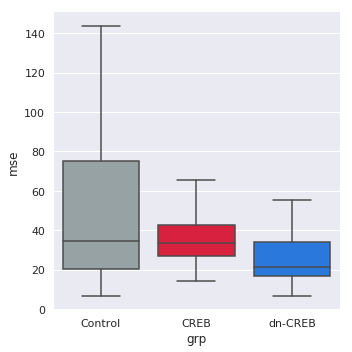

In [20]:
sns.catplot(kind="box",x="grp",y="mse", palette=colors,
            data=df_mse.query("roi_filter == 'Place cells' & pop_size==100"),showfliers=False)

## mse x pop_size (50-1000)

In [1]:
df_ball = pd.read_csv('decode-mse-50-100-500-1000.csv')

colors = creb.colors

df_ball["grp"] = df_ball.grp.astype('category')
# sort
df_ball.grp.cat.set_categories(["Control","CREB","dn-CREB"], inplace=True)

df_mse = df_ball.groupby(["expt_id","grp","mouse","pop_size","roi_filter"],as_index=False).agg({"mse":'mean'})


# two trials with very high >400 mse on 100 pop size, place cells
df_mse.drop(df_mse.query('expt_id in [12813,12891]').index,inplace=True)

sns.catplot(kind="point",data = df_mse,hue="grp",col ="roi_filter",x = "pop_size",y = "mse",ci=95,palette = colors)
plt.show()

<Figure size 1121.38x500 with 2 Axes>

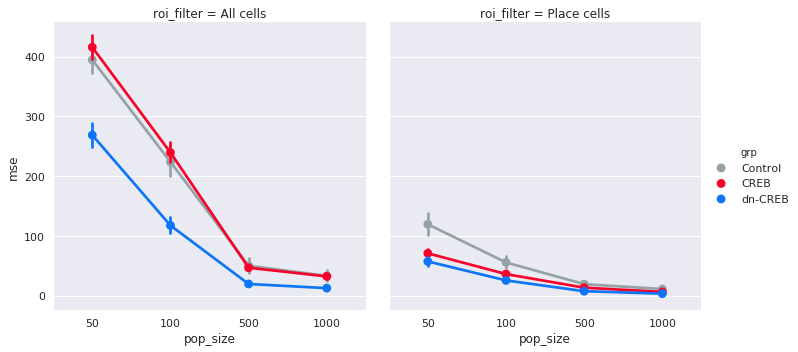

In [5]:
sns.catplot(kind="point",data = df_mse,hue="grp",col ="roi_filter",x = "pop_size",y = "mse",ci=95,palette = colors)
plt.show()

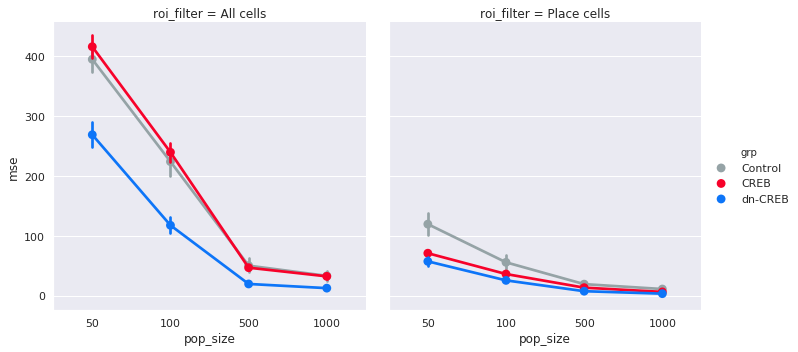

In [34]:
df_ball = pd.read_csv('decode-mse-50-100-500-1000.csv')

colors = creb.colors

df_ball["grp"] = df_ball.grp.astype('category')
# sort
df_ball.grp.cat.set_categories(["Control","CREB","dn-CREB"], inplace=True)

df_mse = df_ball.groupby(["expt_id","grp","mouse","pop_size","roi_filter"],as_index=False).agg({"mse":'mean'})


# two trials with very high >400 mse on 100 pop size, place cells
df_mse.drop(df_mse.query('expt_id in [12813,12891]').index,inplace=True)

sns.catplot(kind="point",data = df_mse,hue="grp",col ="roi_filter",x = "pop_size",y = "mse",ci=95,palette = colors)
plt.show()

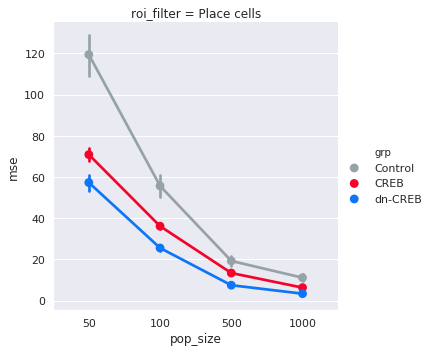

In [33]:
# just place cells
sns.catplot(data = df_mse.query("roi_filter == 'Place cells'"),
            hue="grp",col ="roi_filter",x = "pop_size",y = "mse",
            kind="point",ci=68,palette=colors)
plt.show()


## merge with other df

In [7]:
df_expt = pd.read_csv('big-df-by-expt.csv')

df_merge = pd.merge(df_mse,df_expt,left_on = "expt_id",right_on ="trial_id",suffixes=('','_y'))

## day 4

In [47]:
df_merge_4 = df_merge.query("day==4")

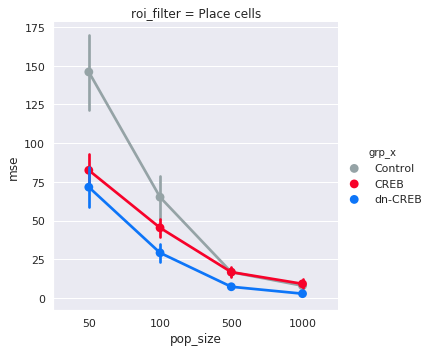

In [51]:
# just place cells
sns.catplot(data = df_merge_4.query("roi_filter == 'Place cells'"),
            hue="grp",col ="roi_filter",x = "pop_size",y = "mse",
            kind="point",ci=68,palette=colors)
plt.show()


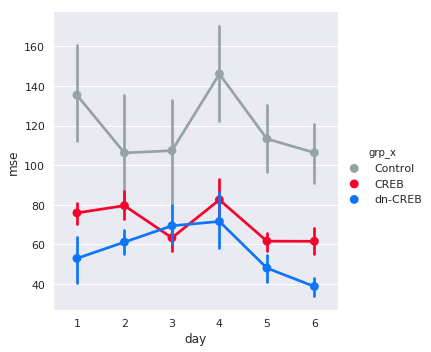

In [79]:
sns.catplot(data = df_merge.query("roi_filter == 'Place cells' & pop_size==50"),
            kind="point",
            x ="day",
            y = "mse",
            hue="grp",
            palette = colors,
           ci = 68)

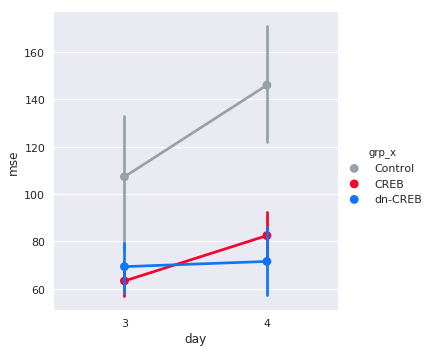

In [88]:
# day 3 + 4

df_diff = df_merge.query("roi_filter == 'Place cells' & pop_size==50 & day in [3,4]")
                             
sns.catplot(data = df_merge.query("roi_filter == 'Place cells' & pop_size==50 & day in [3,4]"),
            kind="point",
            x ="day",
            y = "mse",
            hue="grp",
            palette = colors,
           ci = 68)

## by session

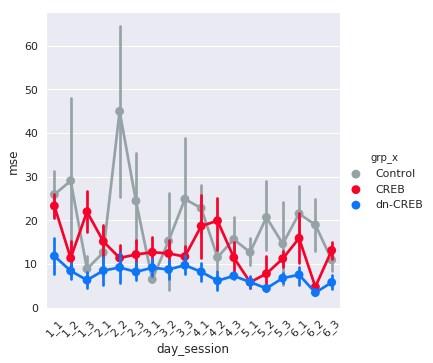

In [84]:
# session
df_merge["day_session"] = df_merge.session_day.apply(lambda x: x[::-1]) # easier sort column
df_merge.sort_values('day_session',inplace=True)


g = sns.catplot(data = df_merge.query("roi_filter == 'Place cells' & pop_size==500"),
            kind="point",
            x ="day_session",
            y = "mse",
            hue="grp_x",
            palette = colors,
           ci = 68)

g.set_xticklabels(rotation=45)

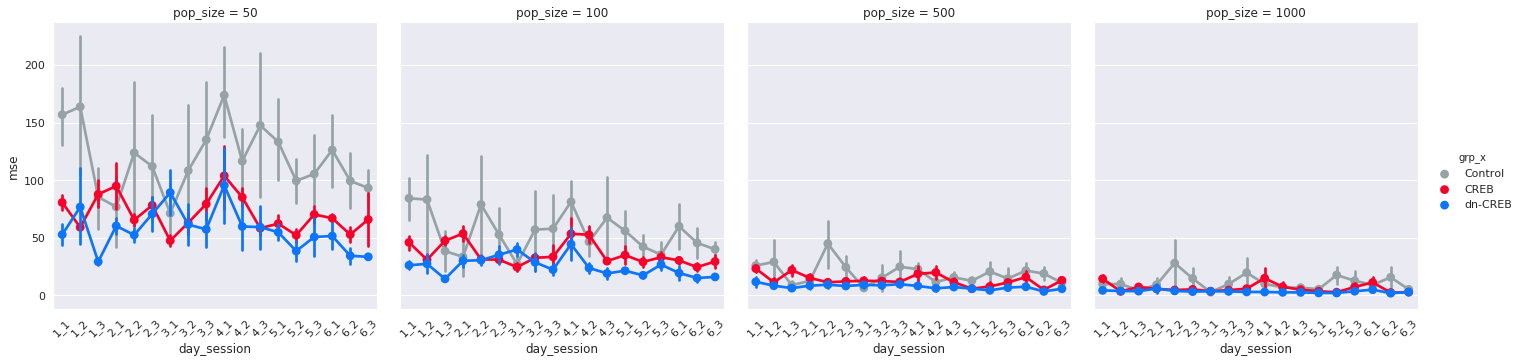

In [87]:
# session
df_merge["day_session"] = df_merge.session_day.apply(lambda x: x[::-1]) # easier sort column
df_merge.sort_values('day_session',inplace=True)


g = sns.catplot(data = df_merge.query("roi_filter == 'Place cells'"),
            kind="point",
            x ="day_session",
            y = "mse",
            hue="grp_x",
            col = "pop_size",
            palette = colors,
           ci = 68)

g.set_xticklabels(rotation=45)